# Optical Flow tutorial

The idea here is to recycle the tutorial code that we used with Interspecifics when the lab and them were together at MediaLab in Madrid. The original tutorial being [here](https://interspecifics.cc/comunicacionesespeculativas/2017/08/11/tutorial-estudio-del-movimiento-con-optical-flow/) We will play with images depicting **Saturn** objects which we can define in the morphology of colonies from [Paenibacillus](https://en.wikipedia.org/wiki/Paenibacillus) 

We first **import four modules** we will need into the `Python3` environment

In [2]:
# import OpenCV module  (Computer Vision)
import cv2 as cv

# import PyPlot module from MatPlotLib (Plotting Images)
import matplotlib.pyplot as plt

# import Numerical Python module (Numerical arrays)
import numpy as np

# import a module to manipulate Unix-like file PATH structures in the file system (PATH Unix-like)
from glob import glob

In [3]:
# Lets import the path to the sample images as our input file names variable
in_fns = glob("./pictures_Saturns/*.jpg")

In [4]:
# Just in case is always nice to sort them
in_fns = sorted(in_fns)

We need **two consecutive images** for Optical Flow analysis.

In [5]:
# We first load the first image and use it as reference
old_frame = cv.imread(in_fns[0], cv.IMREAD_UNCHANGED)
# We will also need a second image taken immediatly after
frame = cv.imread(in_fns[1],cv.IMREAD_UNCHANGED)

In [6]:
%matplotlib inline

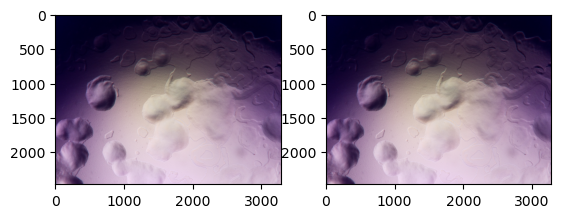

In [7]:
figure, axis_array = plt.subplots(1,2)
axis_array[0].imshow(old_frame)
axis_array[1].imshow(frame)

In [8]:
# First we convert the images to gray scale
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

In [9]:
# We will skip the edge detection parts and focus only on the Optical Flow
# However we do Canny edge detection anyway
old_gray_canny = cv.Canny(old_frame,30,30)
frame_gray_canny = cv.Canny(frame_gray, 30, 30)

**Note** We can Perform the Optical Flow on both gray images. With Edge detected or not. First Lets do it on the original `old_gray` image with no edge detection.

In [10]:
# We Create a Grid of points to Observe.
h ,w , c = old_frame.shape   # dimensions
pts = []                     # List of points to analyze
# We define a variable to store the resolution of the grid
res = 50
for i in range (0 , w , res ):
    for j in range (0 , h , res ):
        pts . append ([[ i , j ]])
p0 = np.array (pts , dtype = "float32")

After creating the **sample grid** we need to set up the **Parameters for the Lukas-Kanade** algorithm of Optical Flow. 

In [11]:
lk_params = dict(winSize = (15, 15),
                maxLevel = 4,
                criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10 , 0.03))

Based on the reference image, we create a new image canvas to draw the vector field of the flow

In [12]:
vfield = np.zeros_like(old_frame)

Now we are ready to calculate the flow between the two images using our grid and the parameters using `calcOpticalFlowPyrLK`.

In [13]:
p1, status, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

In [14]:
# We filter and consider only those points that regustered flow movement
good_new = p1[status == 1]
good_old = p0[status == 1]

Now we are ready to **Draw** the **Vector Field** representing the **Optical Flow**

In [15]:
# We loop over all vectors 
for i, (new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    cv.arrowedLine(vfield, (int(a),int(b)), (int(c),int(d)), (127,125,125), 10)

We now have the Vector field image `vfield` with arrows representing flow

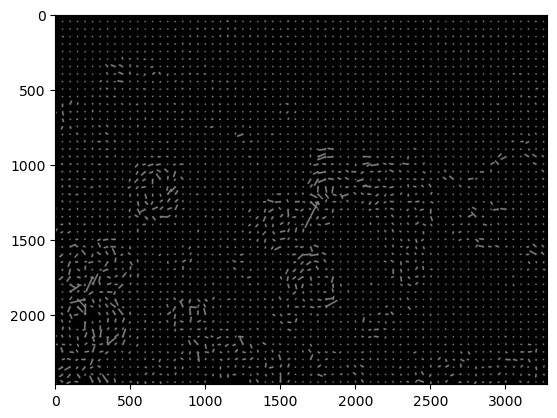

In [16]:
plt.imshow(vfield)

We can add these to the original imaged to produce a final result:

In [17]:
img = cv.add(frame, vfield)

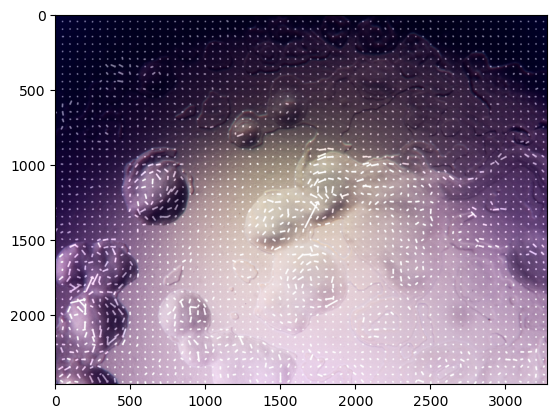

In [18]:
plt.imshow(img)

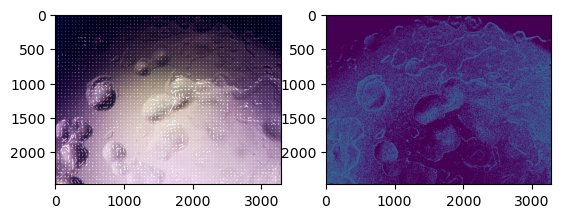

In [20]:
figure, axis_array = plt.subplots(1,2)
axis_array[0].imshow(img)
axis_array[1].imshow(frame_gray_canny)